# 課題

一巡伝達関数が
\begin{eqnarray}
L(s)  = \frac{k}{(s+1)(s+2)(s+3)} = \frac{k}{s^3+6s^2+11s+6} \nonumber
\end{eqnarray}

で表されるフィードバック制御について, $k = 30$でのゲイン余裕$G_m$として, ゲインをあらためて
\begin{eqnarray}
k_1=0.5G_m\times k, 　k_2=0.7G_m\times k, 　k_3=G_m\times k \nonumber
\end{eqnarray}

とした3通りのフィードバック制御系を考える．$k_1$が最もゲイン余裕があり, $k_3$ではゲイン余裕がなくなっているはずである．

(1). $L(s)$の$k= 30$でのゲイン余裕（単位：dB）, 位相余裕（単位：deg）, 位相交差周波数（単位：rad/sおよびHz）, ゲイン交差周波数（単位：rad/sおよびHz）を求めよ.

(2). 上記の$k_1,k_2,k_3$のそれぞれについてフィードバック制御系全体でのステップ応答を描画し, ゲイン余裕の大きさがステップ応答に及ぼす影響を考察せよ．

(3). 安定限界におけるステップ応答（$k_3$の場合）は減衰せずに振動する形になる。描画したステップ応答のグラフからこの振動の周波数を読み取り, (1)の結果も踏まえてその値が何に対応するか考察せよ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
t = np.linspace(0, 10, 100)

In [2]:
z = []
p = [-1, -2, -3]
k = 30

n, d = zpk2tf(z, p, k)
L = tf(n, d)

Gm,Pm,wp,wg = margin(L)
Gm_dB = 20 * np.log10(Gm)
wp_Hz = wp / (2 * np.pi)
wg_Hz = wg / (2 * np.pi)

#### (1). $L(s)$の$k= 30$でのゲイン余裕（単位：dB）, 位相余裕（単位：deg）, 位相交差周波数（単位：rad/sおよびHz）, ゲイン交差周波数（単位：rad/sおよびHz）を求めよ.

In [3]:
print("ゲイン余裕　　　　　　　　     ：{} [dB]".format(Gm_dB))
print("位相余裕　　　　　　　　　     ：{} [deg]".format(Pm))
print("位相交差周波数（単位：rad/s）　：{}   [rad/s]".format(wp))
print("位相交差周波数（単位：Hz）   　：{} [Hz]".format(wp_Hz))
print("ゲイン交差周波数（単位：rad/s）：{} [rad/s]".format(wg))
print("ゲイン交差周波数（単位：Hz）   ：{}[Hz]".format(wg_Hz))

ゲイン余裕　　　　　　　　     ：6.020599913279624 [dB]
位相余裕　　　　　　　　　     ：25.42556665372814 [deg]
位相交差周波数（単位：rad/s）　：3.3166247903554   [rad/s]
位相交差周波数（単位：Hz）   　：0.527857229766183 [Hz]
ゲイン交差周波数（単位：rad/s）：2.348556793565214 [rad/s]
ゲイン交差周波数（単位：Hz）   ：0.3737844228279558[Hz]


#### (2). 上記の$k_1,k_2,k_3$のそれぞれについてフィードバック制御系全体でのステップ応答を描画し, ゲイン余裕の大きさがステップ応答に及ぼす影響を考察せよ．

フィードバック制御系全体での伝達関数を$G(s)$とすると以下のようになる．
\begin{eqnarray}
G(s) &=& \frac{L(s)}{1+L(s)} \nonumber \\
&=& \cfrac{\cfrac{k}{s^3+6s^2+11s+6}}{1+\cfrac{k}{s^3+6s^2+11s+6}} \nonumber \\
&=& \frac{k}{s^3+6s^2+11s+(6+k)} \nonumber
\end{eqnarray}

In [4]:
k1 = 0.5 * Gm * k
k2 = 0.7 * Gm * k
k3 = Gm * k

n1 = [k1]
n2 = [k2]
n3 = [k3]

d1 = [1, 6, 11, 6+k1]
d2 = [1, 6, 11, 6+k2]
d3 = [1, 6, 11, 6+k3]

P1 = tf(n1, d1)
P2 = tf(n2, d2)
P3 = tf(n3, d3)

y1, t = step(P1, t)
y2, t = step(P2, t)
y3, t = step(P3, t)

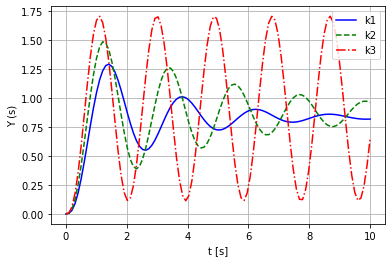

In [5]:
plt.plot(t, y1, label="k1", color="blue")
plt.plot(t, y2, label="k2", color="green", linestyle="--")
plt.plot(t, y3, label="k3", color="red", linestyle="-.")
plt.xlabel("t [s]")
plt.ylabel("Y (s)")
plt.legend()
plt.grid()
plt.show()

上記のグラフから, ゲイン余裕が大きくなるほど整定時間は長くなり, 振動の周波数は高くなっていることが読み取れる．よって, ゲイン余裕の大きさは整定時間と振動の周波数に影響を与えていると考えられる．

#### (3). 安定限界におけるステップ応答（$k_3$の場合）は減衰せずに振動する形になる。描画したステップ応答のグラフからこの振動の周波数を読み取り, (1)の結果も踏まえてその値が何に対応するか考察せよ.

以下に安定限界におけるステップ応答のグラフを拡大したものを示す．

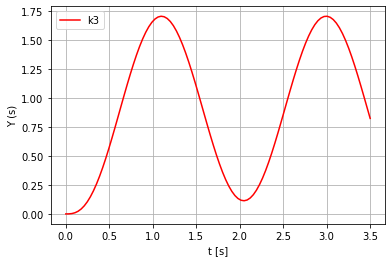

In [6]:
t = np.linspace(0, 3.5, 100)

y3, t = step(P3, t)

plt.plot(t, y3, label="k3", color="red")
plt.xlabel("t [s]")
plt.ylabel("Y (s)")
plt.legend()
plt.grid()
plt.show()

上記のグラフからこの振動の周期が約1.9[s]であることがわかる．この周期から振動の周波数を求めると，約0.526[Hz]となる．(1)の結果も踏まえると, 安定限界におけるステップ応答の振動の周波数は, 位相交差周波数に対応すると考えられる．